In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io as sio
import pandas as pd

Text(0.5, 1.0, 'Mouse Movement Over Time')

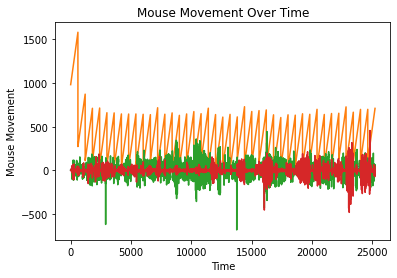

In [2]:
# load the data from the .mat file
filename = './sample data 2/1_19-Oct-2019_10-18-23_mouse.mat'
data = sio.loadmat(filename)

mouseMovement = data['mouseMovement']
# extract the x and y coordinates
x = data['mouseMovement'][0]
y = data['mouseMovement'][1]

fig, ax = plt.subplots()
# Plot the mouseMovement values over time
ax.plot(range(len(mouseMovement)), mouseMovement)

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Mouse Movement')
ax.set_title('Mouse Movement Over Time')

In [3]:
def traj_withColour(x, y, fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    colors = np.linspace(0, 1, len(x))
    ax.plot(x, y, '-k', alpha=0.2)
    ax.scatter(x, y, c=colors, cmap='turbo')
    ax.plot(x[0], y[0], 'Dr', label='start', markersize=8)
    ax.axis('equal')
    norm = mpl.colors.Normalize(vmin=0, vmax=len(x))
    cbar = fig.colorbar(mpl.cm.ScalarMappable(
        cmap='turbo', norm=norm), ax=ax)
    cbar.set_label('Time step')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    return fig, ax  # Corrected return statement

In [19]:
# convert mouseMovement from a 2D array to pandas dataframe
df = pd.DataFrame(mouseMovement, columns=['trial', 'sample', 'dx', 'dy'])

# add columns for x and y coordinates by cumulatively summing dx and dy. Group by trial
# df.groupby('trial')
df['x'] = df.groupby('trial')['dx'].cumsum()
df['y'] = df.groupby('trial')['dy'].cumsum()

# ungroup the dataframe
df = df.reset_index(drop=True)
df.head()

,trial,sample,dx,dy,x,y
0,1,982,3,-1,3,-1
1,1,983,3,-1,6,-2
2,1,984,2,-1,8,-3
3,1,985,4,-1,12,-4
4,1,986,7,-3,19,-7


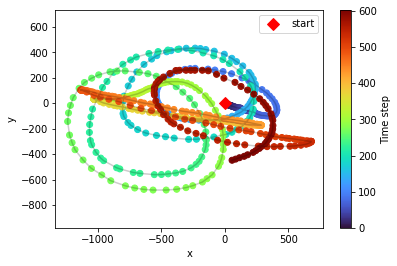

In [20]:
# plot the first trial
df_ = df[df['trial'] == 1]
x = df_[['x']].values
y = df_[['y']].values
fig, ax = traj_withColour(x, y)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tstakuma/Desktop/Rikkyo_Action_Analysis/PRJ/sample data 2/1_19-Oct-2019_10-18-23_mouse.mat'

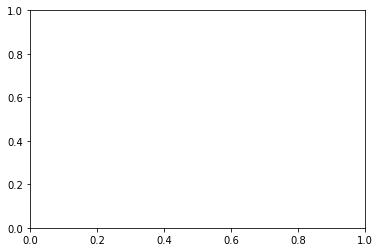

In [7]:
# Turn on interactive mode
# plt.ion()

# Create a figure and axis
fig, axs = plt.subplots()

# Code②: Plotting trajectories
# Load data
data = sio.loadmat('/Users/tstakuma/Desktop/Rikkyo_Action_Analysis/PRJ/sample data 2/1_19-Oct-2019_10-18-23_mouse.mat')

# Extract mouse movement data
mouseMovement = np.array(data['mouseMovement'])

# Calculate the number of rows and columns for the subplots
n = len(mouseMovement)
cols = int(np.sqrt(n))
rows = n // cols
rows += n % cols

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 15))
axs = axs.ravel()

# Plot each mouse movement in a separate subplot
for i in range(n):
    x_data = mouseMovement[i, :, 0]
    y_data = mouseMovement[i, :, 1]
    fig, axs[i] = traj_withColour(x_data, y_data, fig, axs[i])
    axs[i].set_title(f'Mouse Movement {i+1}')


# Remove any unused subplots
for i in range(n, rows*cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()